### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [21]:
import pandas as pd
raw_df = pd.read_csv('marketing_campaign.csv', sep="\t")

У кроці нижче я дивилась, чим розділені мої колонки. Бо спочатку візуально здалось що просто зворотній слеш, але ні. Тому при читанні csv файла я додала умову sep="\t"

In [20]:
with open("marketing_campaign.csv") as f:
    print(f.readline())

ID	Year_Birth	Education	Marital_Status	Income	Kidhome	Teenhome	Dt_Customer	Recency	MntWines	MntFruits	MntMeatProducts	MntFishProducts	MntSweetProducts	MntGoldProds	NumDealsPurchases	NumWebPurchases	NumCatalogPurchases	NumStorePurchases	NumWebVisitsMonth	AcceptedCmp3	AcceptedCmp4	AcceptedCmp5	AcceptedCmp1	AcceptedCmp2	Complain	Z_CostContact	Z_Revenue	Response



In [22]:
raw_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [26]:
#Розмірність таблиці
print("- Кількість рядків:", raw_df.shape[0])
print("- Кількість колонок:", raw_df.shape[1])

#Типи даних у кожній колонці
print("\n- Типи даних у колонках:")
print(raw_df.dtypes)

#Кількість пропущених значень
print("\n- Кількість пропущених значень у кожній колонці:")
print(raw_df.isnull().sum())

- Кількість рядків: 2240
- Кількість колонок: 29

- Типи даних у колонках:
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

- Кількість

**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

Income: Річний дохід домогосподарства клієнта - Ця колонка має пропущенні значення.
Це кількісна колонка, пропущено 24 значення, що не має високого впливу на дані, тому ми можемо заповнити ці пропущенні значення медіаною. Також визначення річного доходу я пов'язала з факторами, які на мою думку суттєво впливають, а саме освіта та сімейний стан.

In [28]:
raw_df['Income'].describe()


,Income
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
max,666666.000000


In [29]:
raw_df['Income'] = raw_df.groupby(['Education', 'Marital_Status'])['Income'].transform(
    lambda x: x.fillna(x.median())
)

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [34]:
raw_df['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [38]:
#2n Cycle другий ступінь освіти, що можна об'єднати з Master
raw_df['Education'] = raw_df['Education'].replace({
    '2n Cycle': 'Master'
})

In [40]:
#тепер маємо чотири ознаки по освіті
raw_df['Education'].value_counts()

,count
Education,
Graduation,1127
Master,573
PhD,486
Basic,54


In [44]:
#З допомогою One-Hot Encoding закодувала категорії в числовий формат

raw_df = pd.get_dummies(raw_df, columns=['Education'], drop_first=True)

KeyError: "None of [Index(['Education'], dtype='object')] are in the [columns]"

Тепер теж саме робимо для колонки Marital_Status

In [35]:
raw_df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [46]:
raw_df['Marital_Status'] = raw_df['Marital_Status'].replace({
    'Together': 'Married',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Other',
    'YOLO': 'Other'
})

In [47]:
#тепер маємо чотири ознаки по освіті
raw_df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,1444
Single,792
Other,4


In [48]:
raw_df = pd.get_dummies(raw_df, columns=['Marital_Status'], drop_first=True)

Також ми маємо дві колонки з датами, перша це дата народження клієнта, друга - рік реєстрації у компанії. Так як мета завдання - виконати кластеризацію, щоб виявити сегменти клієнтів, я обираю дату народження клієнта, що допоможе мені сегментувати клієнтів за віком.

In [36]:
raw_df['Year_Birth'].value_counts()

,count
Year_Birth,
1976,89
1971,87
1975,83
1972,79
1978,77
1970,77
1965,74
1973,74
1969,71


По к-ті значень одразу кидаються в очі 1900, 1899, 1941, 1940,1893. Як на мене вони явно помилкові або цих клієнтів вже немає з нами... Тому треба почистити та замінити такі помилкові значення на медіану. Після чистки я поділю всіх для зручності по віку

In [50]:
# Задати діапазон допустимих років
raw_df.loc[(raw_df['Year_Birth'] < 1940) | (raw_df['Year_Birth'] > 2005), 'Year_Birth'] = None

In [51]:
median_year = raw_df['Year_Birth'].median()
raw_df['Year_Birth'] = raw_df['Year_Birth'].fillna(median_year)

In [52]:
raw_df['Age'] = 2025 - raw_df['Year_Birth']

In [54]:
#тепер маємо гарніші та читабельні дані
raw_df['Age'].value_counts()

,count
Age,
49.0,89
54.0,87
50.0,83
55.0,80
53.0,79
47.0,77
60.0,74
52.0,74
56.0,71


**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

1. Запишіть в змінну X ті дані, які будете кластеризувати.

In [55]:
feature_cols = [
    'Age', 'Income', 'Kidhome', 'Teenhome',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'
]

categorical_cols = [col for col in raw_df.columns if 'Education_' in col or 'Marital_Status_' in col]
feature_cols.extend(categorical_cols)

X = raw_df[feature_cols]

print(X.head())
print("Розмір X:", X.shape)

    Age   Income  Kidhome  Teenhome  MntWines  MntFruits  MntMeatProducts  \
0  68.0  58138.0        0         0       635         88              546   
1  71.0  46344.0        1         1        11          1                6   
2  60.0  71613.0        0         0       426         49              127   
3  41.0  26646.0        1         0        11          4               20   
4  44.0  58293.0        1         0       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                

2. Побудуйте кластеризацію з KMeans на 3 кластери.

In [56]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)

labels = kmeans.predict(X)
print(labels)

[2 2 0 ... 2 0 2]


3. Обчисліть метрику силуету для цієї кластеризації.

In [66]:
from sklearn import metrics
centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.54


**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

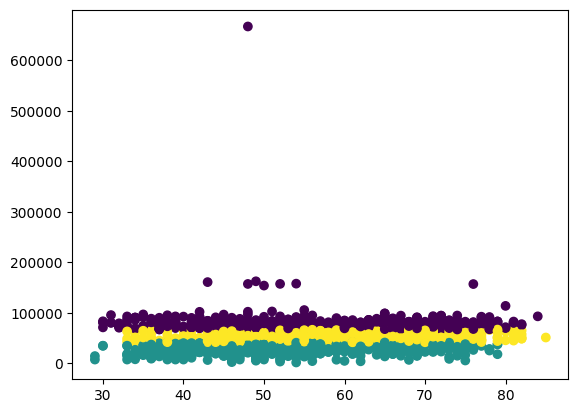

In [71]:
import matplotlib.pyplot as plt

plt.scatter(X['Age'], X['Income'], c=labels)
plt.show()

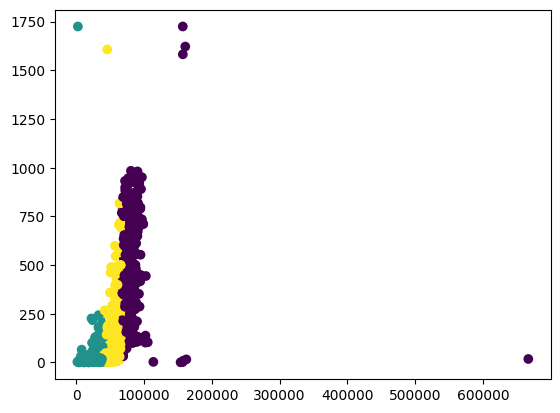

In [86]:
import matplotlib.pyplot as plt

plt.scatter(X['Income'], X['MntMeatProducts'], c=labels)
plt.show()

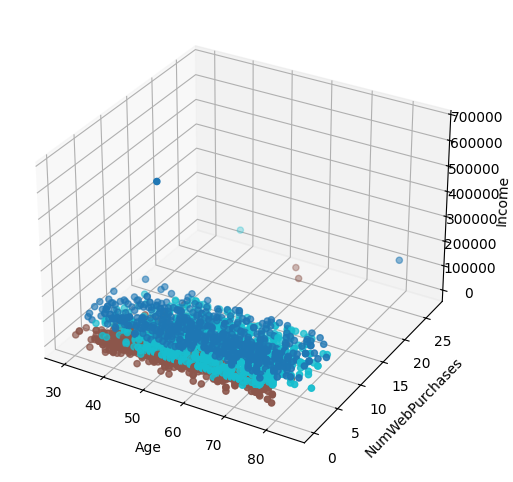

In [89]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Age'], X['NumWebPurchases'], X['Income'], c=labels, cmap='tab10', s=20)
ax.set_xlabel('Age')
ax.set_ylabel('NumWebPurchases')
ax.set_zlabel('Income')
plt.show()

**Завдання 6**. Масштабуйте дані (StandardScaler/MinMaxScaler) і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [93]:
from sklearn.metrics import silhouette_score

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels_scaled = kmeans.fit_predict(X_scaled)

# Силует
silhouette_scaled = silhouette_score(X_scaled, labels_scaled)
print("silhouette_score(з масштабуванням):", silhouette_scaled)


silhouette_score: 0.18652531714272577


In [94]:
kmeans_no_scale = KMeans(n_clusters=3, random_state=42)
labels_no_scale = kmeans_no_scale.fit_predict(X)

silhouette_no_scale = silhouette_score(X, labels_no_scale)
print("silhouette_score (без масштабування):", silhouette_no_scale)

silhouette_score (без масштабування): 0.5376534809121737


Порівнюючи результати силуету, ми бачимо, що без масштабування всі ознаки в однаковому масштабі, відстані між точками в нормальному стані. Після масштабування значення значно погіршились, бачимо що великі ознаки перетягують центри кластерів.

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

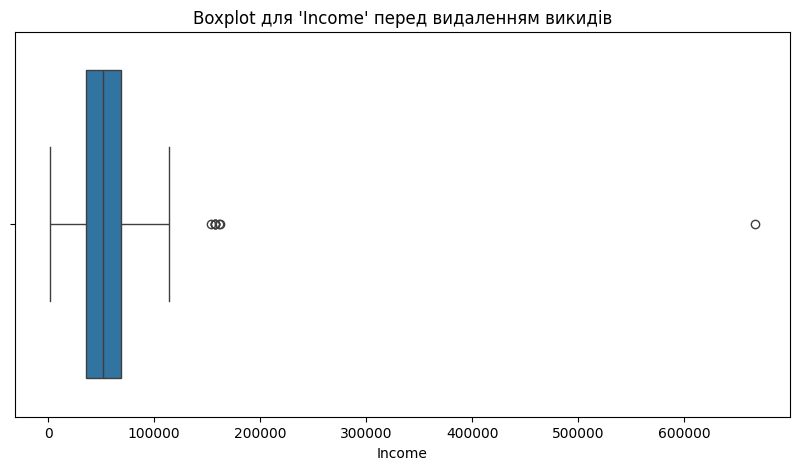

Рядків до видалення викидів: 2240
Рядків після видалення викидів: 2232
Видалено рядків: 8


In [95]:
import seaborn as sns
# Візуалізація розподілу значень Income
plt.figure(figsize=(10, 5))
sns.boxplot(x=X['Income'])
plt.title("Boxplot для 'Income' перед видаленням викидів")
plt.show()

# Обчислення меж IQR
Q1 = X['Income'].quantile(0.25)
Q3 = X['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фільтрація рядків без викидів
X_no_outliers = X[(X['Income'] >= lower_bound) & (X['Income'] <= upper_bound)]

# Підрахунок змін
rows_before = X.shape[0]
rows_after = X_no_outliers.shape[0]
rows_removed = rows_before - rows_after

print(f"Рядків до видалення викидів: {rows_before}")
print(f"Рядків після видалення викидів: {rows_after}")
print(f"Видалено рядків: {rows_removed}")

**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

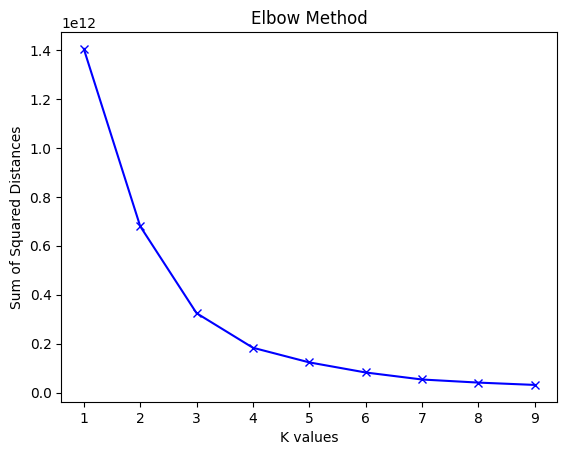

In [96]:
K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(X)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

In [99]:
kmeans_no_scale = KMeans(n_clusters=3, random_state=42)
labels_no_scale = kmeans_no_scale.fit_predict(X_no_outliers)

silhouette_no_scale = silhouette_score(X_no_outliers, labels_no_scale)
print("silhouette_score (без масштабування):", silhouette_no_scale)

silhouette_score (без масштабування): 0.5516073579551508


**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

In [100]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

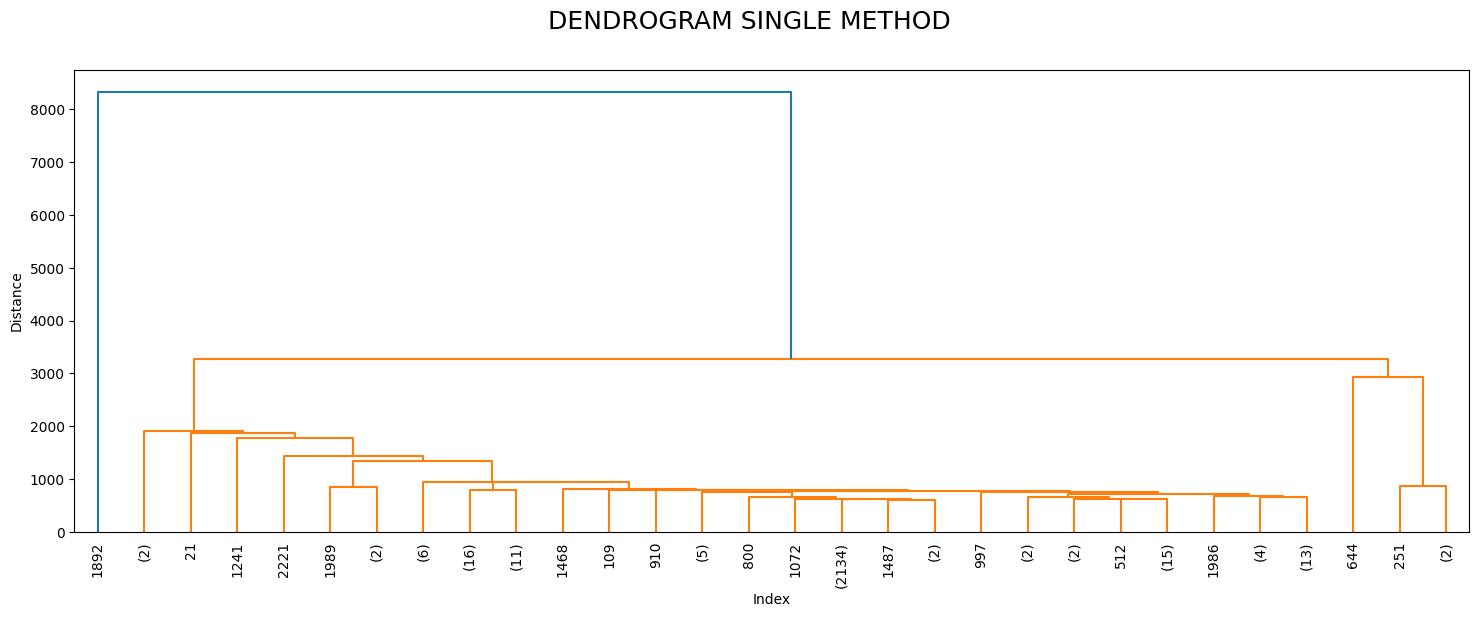

In [102]:
dist_sin = linkage(X_no_outliers, method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

In [104]:
X_no_outliers['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
X_no_outliers['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')

/tmp/ipython-input-752232083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_no_outliers['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
/tmp/ipython-input-752232083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_no_outliers['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')


<Axes: title={'center': 'K = 3'}, xlabel='Income', ylabel='NumWebPurchases'>

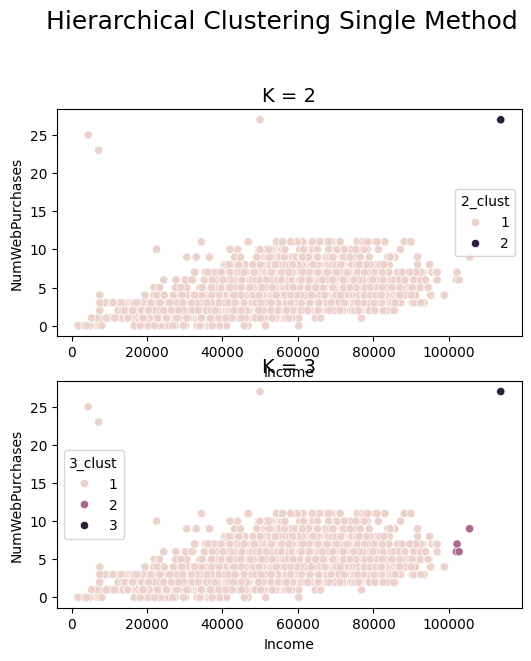

In [107]:
import seaborn as sns

plt.figure(figsize=(6,10))

plt.suptitle("Hierarchical Clustering Single Method",fontsize=18)

plt.subplot(3,1,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="Income",y="NumWebPurchases", data=X_no_outliers, hue="2_clust")

plt.subplot(3,1,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="Income",y="NumWebPurchases", data=X_no_outliers, hue="3_clust")

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

In [108]:
from sklearn.cluster import DBSCAN

In [110]:
dbscan = DBSCAN(eps=1.6, min_samples=10)
dbscan.fit(X_scaled)
labels_DBS = dbscan.labels_
print(labels_DBS)

[-1  0 -1 ... -1 -1 14]


In [112]:
n_clusters_ = len(set(labels_DBS)) - (1 if -1 in labels_DBS else 0)

n_noise_ = list(labels_DBS).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

s = metrics.silhouette_score(X, dbscan.labels_)
print(f'Silhouette Coefficient for the data Dataset Clusters (DBSCAN): {s:.2f}')

Estimated number of clusters: 23
Estimated number of noise points: 1336
Silhouette Coefficient for the data Dataset Clusters (DBSCAN): -0.45


DBSCAN у цьому наборі даних не спрацював: негативне значення Silhouette Score (−0.45) свідчить, що знайдена структура кластерів випадкова або невідповідна для поточної конфігурації алгоритму.